In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"D:\Social_Network_Ads.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset.drop("User ID",axis=1,inplace=True)

In [5]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
dataset.isnull().any()

Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

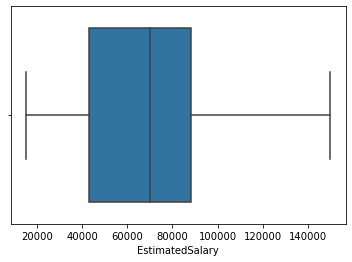

In [7]:
sns.boxplot(dataset["EstimatedSalary"])

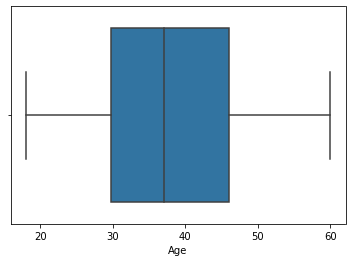

In [8]:
sns.boxplot(dataset["Age"])

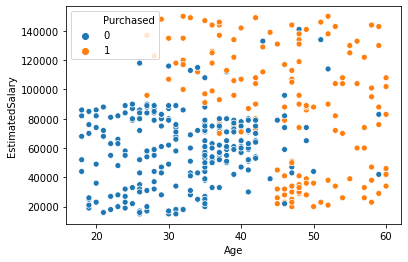

In [9]:
sns.scatterplot(dataset["Age"],dataset["EstimatedSalary"],hue=dataset["Purchased"])

In [10]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


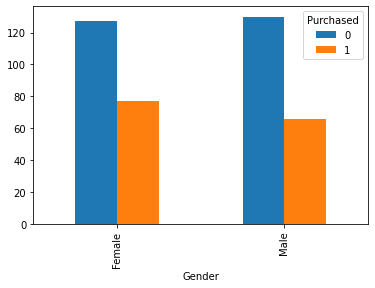

In [11]:
pd.crosstab(dataset["Gender"],dataset["Purchased"]).plot(kind="bar")

In [12]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [13]:
dataset=pd.get_dummies(dataset,columns=["Gender"])

In [14]:
dataset

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [15]:
x=dataset.iloc[:,0:2]#rows,colums

In [16]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [17]:
y=dataset["Purchased"]

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Building the model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
#n_estimators--No Of decision trees
rf_model=RandomForestClassifier(n_estimators=100,criterion="entropy")

In [119]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [120]:
#rf_model--Trained DT model

### Prediction

In [121]:
y_pred=rf_model.predict(x_test)

In [122]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [123]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [111]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [113]:
print("Test Accuracy:",accuracy_score(y_test,y_pred)*100,"%")

Test Accuracy: 90.0 %


In [114]:
y_pred_train=rf_model.predict(x_train)

In [115]:
y_pred_train

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [116]:
y_train

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 320, dtype: int64

In [117]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train)*100,"%")

Train Accuracy: 99.6875 %


In [89]:
cf_test=confusion_matrix(y_test,y_pred)

In [90]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x205332c7bc8>)

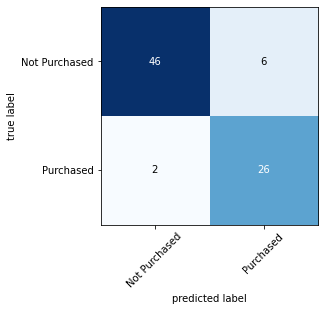

In [91]:
plot_confusion_matrix(cf_test,class_names=["Not Purchased","Purchased"])

In [92]:
cf_train=confusion_matrix(y_train,y_pred_train)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20531a21708>)

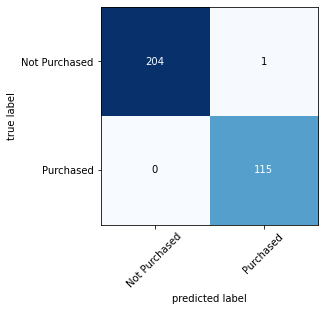

In [93]:
plot_confusion_matrix(cf_train,class_names=["Not Purchased","Purchased"])

In [94]:
from mlxtend.plotting import plot_decision_regions

In [95]:
x_train.values

array([[    27,  57000],
       [    46,  28000],
       [    39, 134000],
       [    44,  39000],
       [    57,  26000],
       [    32, 120000],
       [    41,  52000],
       [    48,  74000],
       [    26,  86000],
       [    22,  81000],
       [    49,  86000],
       [    36,  54000],
       [    40,  59000],
       [    41,  80000],
       [    26,  16000],
       [    39,  79000],
       [    59, 130000],
       [    42,  64000],
       [    53, 143000],
       [    34, 112000],
       [    57, 122000],
       [    39,  71000],
       [    47,  25000],
       [    24,  19000],
       [    36,  50000],
       [    32, 150000],
       [    48,  29000],
       [    30, 107000],
       [    60,  34000],
       [    38,  61000],
       [    33,  31000],
       [    39,  71000],
       [    55,  39000],
       [    49,  39000],
       [    43, 112000],
       [    27,  20000],
       [    26,  17000],
       [    37,  93000],
       [    42,  54000],
       [    35,  61000],


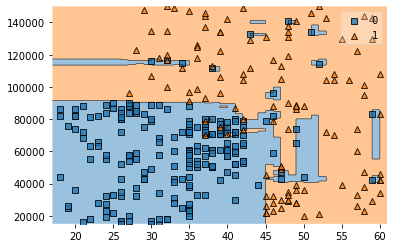

In [96]:
plot_decision_regions(x_train.values,y_train.values,clf=rf_model)

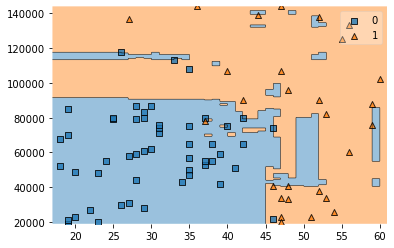

In [97]:
plot_decision_regions(x_test.values,y_test.values,clf=rf_model)

In [98]:
x_train.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [99]:
x_train.head()

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000


In [100]:
x_train.shape

(320, 2)

In [104]:
rf_model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2144035607),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1531719247),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=944070737),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=109222533),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=61733890),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=183217266),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1217285432),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=567943522),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
            

In [102]:
from sklearn.tree import plot_tree

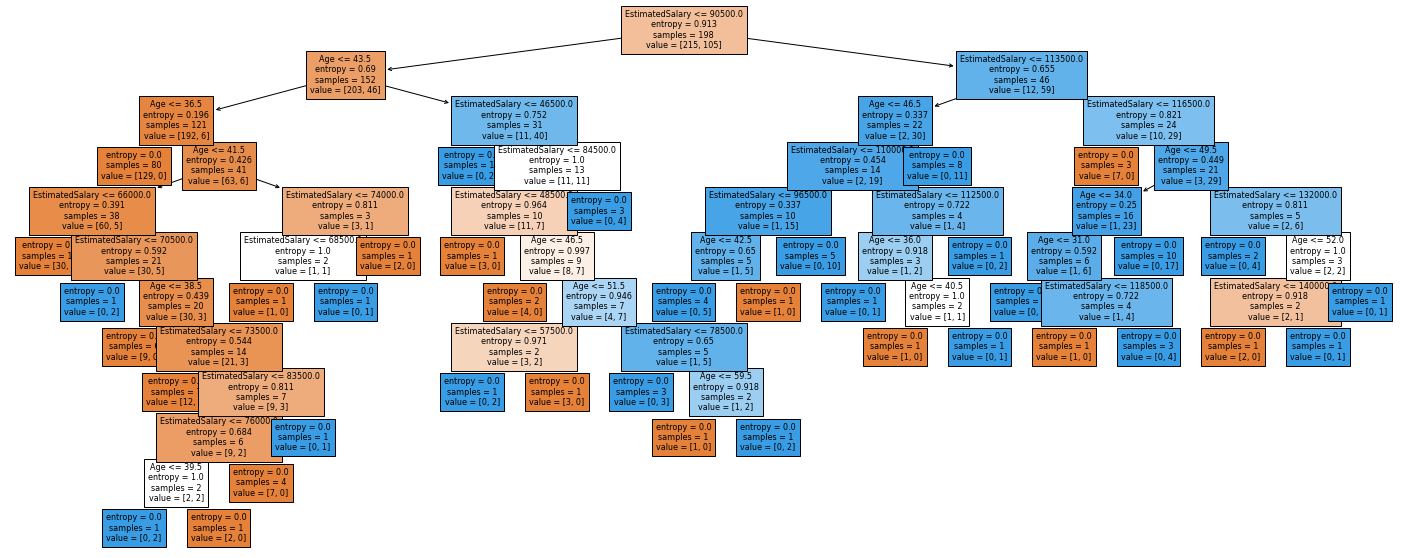

In [103]:
plt.figure(figsize=(25,10))
plot_tree(rf_model.estimators_[9],fontsize=8,filled=True,feature_names=x_train.columns)
plt.show()

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



### Real time prediction

In [68]:
dataset.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [69]:
age=35
salary=40000
gender="Male"

In [70]:
data=[[age,salary]]

In [71]:
data

[[35, 40000]]

In [72]:
rf_model.predict(data)

array([0], dtype=int64)

In [73]:
import joblib

In [75]:
joblib.dump(rf_model,"purchase_prediction.pkl")

['purchase_prediction.pkl']